## Silver Alert Greece - Εξαφανίσεις Γραμμή Ζωής που βρέθηκαν
**Παπαχρήστου Σοφία**

Θα προσπαθήσω να συλλέξω και πληροφορίες για άτομα που έχουν βρεθεί, πχ να δω και πόσοι συνολικά είναι κτλ...

https://www.lifelinehellas.gr/%ce%ba%ce%ad%ce%bd%cf%84%cf%81%ce%bf-%cf%84%cf%8d%cf%80%ce%bf%cf%85/silver-alert-hellas-2/

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import requests
import time

In [2]:
req = Request('https://www.lifelinehellas.gr/%ce%ba%ce%ad%ce%bd%cf%84%cf%81%ce%bf-%cf%84%cf%8d%cf%80%ce%bf%cf%85/silver-alert-hellas-2/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
silver_alert = BeautifulSoup(webpage, "html.parser")

##1. Βρίσκω το url του εξαφανισμένου ατόμου που βρέθηκε

In [3]:
urls = silver_alert.find_all('div', {'class': 'image'})

for u in urls:
  print(u.a['href'])

https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%ad%ce%b8%ce%b7%ce%ba%ce%b5-%cf%83%cf%8e%ce%bf%cf%82-195/
https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%ad%ce%b8%ce%b7%ce%ba%ce%b5-%cf%83%cf%8e%ce%b1-92/
https://www.lifelinehellas.gr/%ce%be%ce%b1%ce%bd%ce%b1%ce%b2%cf%81%ce%ae%ce%ba%ce%b5-%cf%84%ce%b7%ce%bd-%ce%bf%ce%b9%ce%ba%ce%bf%ce%b3%ce%ad%ce%bd%ce%b5%ce%b9%ce%ac-%cf%84%ce%bf%cf%85-%cf%87%ce%ac%cf%81%ce%b7-%cf%83%cf%84%ce%bf-10/
https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%ad%ce%b8%ce%b7%ce%ba%ce%b5-%cf%87%ce%ac%cf%81%ce%b7-%cf%83%cf%84%ce%bf-silver-alert-10/
https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%ad%ce%b8%ce%b7%ce%ba%ce%b5-%cf%83%cf%8e%ce%bf%cf%82-%ce%bf-%ce%b8%cf%8d%ce%bc%ce%b9%ce%bf%cf%82/
https://www.lifelinehellas.gr/%ce%be%ce%b1%ce%bd%ce%b1%ce%b2%cf%81%ce%ae%ce%ba%ce%b5-%cf%84%ce%b7%ce%bd-%ce%bf%ce%b9%ce%ba%ce%bf%ce%b3%ce%ad%ce%bd%ce%b5%ce%b9%ce%ac-%cf%84%ce%bf%cf%85-%cf%87%ce%ac%cf%81%ce%b7-%cf%83%cf%84%ce%bf-9/


##2. Βρίσκω το tag

In [4]:
tags = silver_alert.find_all('span', {'class': 'categories'})

for t in tags:
  print(t.a.text)

Ευρεθέντες
Ευρεθέντες
Αγνώστων Στοιχείων
Ευρεθέντες
Ευρεθέντες
Αγνώστων Στοιχείων


## 3.Βρίσκω την ημερομηνία εύρεσης από την δημοσιευση του άρθρου

In [5]:
date = silver_alert.find('div', attrs={'id': 'content'})

for d in date.findAll("article"):
    print(d.get('sort_date'))

2022-06-30 14:35:46
2022-06-30 00:24:15
2022-06-25 19:45:51
2022-06-19 13:54:26
2022-06-18 20:58:46
2022-06-16 23:22:04


## 4. Αποθηκεύω σε λίστες τα tag και τα urls όλων των σελίδων

In [6]:
# Φτιάχνω λίστες που θα γεμίσω με το καθένα δεδομένο
url_list= []
tag_list= []
date_list= []

base_url = "https://www.lifelinehellas.gr/%ce%ba%ce%ad%ce%bd%cf%84%cf%81%ce%bf-%cf%84%cf%8d%cf%80%ce%bf%cf%85/silver-alert-hellas-2/page/"

#εδώ θα βάλω να αλλάζει το νούμερο στο url, αντίστοιχα με τον αριθμό σελίδας
for i in range(1,150):
    url = base_url + str(i) + "/"
    #print(url)

    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    s = BeautifulSoup(page.content, 'html.parser')

    for u in s.find_all('div', {'class': 'image'}):
        url_list.append(u.a['href'])

    box = s.find('div', attrs={'id': 'content'})
    for d in box.findAll("article"):
        date_list.append(d.get('sort_date'))

    for t in s.find_all('span', {'class': 'categories'}):
        tag_list.append(t.a.text)

In [7]:
len(url_list)

894

## 4. Ανοίγω κάθε url και συλλέγω πληροφορίες
Φτιάχνω λίστα για ότι ηλικία υπάρχει στο text

In [8]:
import re

In [9]:
age_list = []

for i in range(len(url_list)):
  reqs2 = requests.get(url_list[i])
  soup2 = BeautifulSoup(reqs2.content, "html.parser")

  if soup2.find("div", {'class': "entry-content"}):
    for x in soup2.find_all("div", {'class': "entry-content"}):
        age_list.append(re.findall(r"(\d+\W?)+(?:ετών|χρονου|χρονης)", str(x)))
  else:
      age_list.append(None)

In [10]:
len(age_list)

894

Θα μπορούσα να βρω και τα ονόματα των ατόμων που βρέθηκαν μέσα από το κείμενο,βάζοντας τις πρωτες δυο λεξεις που εχουν κεφαλαιο γραμμα στο κειμενο (βέβαια μπορεί να μην ισχύει πάντα) ή να βάλω δυο λέξεις στη σειρά με το πρώτο γράμμα κεφαλαίο ή λέξεις που συνοδεύονται από το κ./ κυρία κτλ... Βέβαια όλα αυτά δεν είναι σίγουρο τι αποτέλεσμα θα βρουν σε τόσα κείμενα οπότε δεν θα ασχοληθώ με τα ονόματα, δεν μου χρειάζονται κιόλας.

## 5. Κάνω df τα δεδομένα μου...

In [12]:
found = pd.DataFrame({'Tags': tag_list, 'Datetime': date_list, 'Url': url_list, 'Age':age_list})
found.head()

,Tags,Datetime,Url,Age
0,Ευρεθέντες,2022-06-30 14:35:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,[71 ]
1,Ευρεθέντες,2022-06-30 00:24:15,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,[54 ]
2,Αγνώστων Στοιχείων,2022-06-25 19:45:51,https://www.lifelinehellas.gr/%ce%be%ce%b1%ce%...,[]
3,Ευρεθέντες,2022-06-19 13:54:26,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,[68 ]
4,Ευρεθέντες,2022-06-18 20:58:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,[39 ]


In [13]:
found['Age'] = found['Age'].str[0]

In [15]:
found['Age'].value_counts()

73     7
71     6
74     6
68     5
81     4
      ..
70     1
40     1
45     1
24     1
61     1
Name: Age, Length: 74, dtype: int64

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
found.to_csv("/content/gdrive/My Drive/Colab Notebooks/silver_alert(found).csv", sep='t', encoding='utf-8', index=False)

In [18]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/silver_alert(found).csv", sep='t')

In [19]:
#df = pd.read_csv("", sep='t')

## 6. Ενώνω dfs και το αποθηκεύω

Ας ενώσω και το df (found) των ευρεθέντων με το df-missing που εχω φτιαξει ήδη [με τους εξαφανισμένους](https://github.com/SophiaPapach/datajour/blob/main/Silver_Alert(missing%20-final_project).ipynb)

In [20]:
missing = pd.read_csv("https://raw.githubusercontent.com/SophiaPapach/datajour/main/silver_alert(missing).csv", sep='t')

In [21]:
dfinal = df.merge(missing, on=("Tags",'Url', 'Datetime', 'Age'), how = 'outer')
dfinal

,Tags,Datetime,Url,Age,Name
0,Ευρεθέντες,2022-06-30 14:35:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,71.0,NaN
1,Ευρεθέντες,2022-06-30 00:24:15,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,54.0,NaN
2,Αγνώστων Στοιχείων,2022-06-25 19:45:51,https://www.lifelinehellas.gr/%ce%be%ce%b1%ce%...,NaN,NaN
3,Ευρεθέντες,2022-06-19 13:54:26,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,68.0,NaN
4,Ευρεθέντες,2022-06-18 20:58:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,39.0,NaN
...,...,...,...,...,...
1039,Εξαφανισθέντες,2011-09-13 20:27:33,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΚΟΝΤΟΜΠΑΣΗΣ ΒΑΣΙΛΕΙΟΣ -
1040,Εξαφανισθέντες,2011-07-30 20:10:59,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΚΑΡΑΝΔΡΕΑΣ ΚΥΡΙΑΚΟΣ -
1041,Εξαφανισθέντες,2011-05-17 20:04:12,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΡΕΒΙΔΗΣ ΕΥΑΓΓΕΛΟΣ -
1042,Εξαφανισθέντες,2011-05-14 20:01:00,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΣΜΠΙΤΑ ΣΟΦΙΑ -


In [22]:
from datetime import datetime

In [23]:
dfinal['Datetime'] = dfinal['Datetime'].astype('datetime64[ns]')

In [24]:
dfinal['Year'] = pd.DatetimeIndex(dfinal['Datetime']).year
dfinal['Month'] = pd.DatetimeIndex(dfinal['Datetime']).month

In [25]:
dfinal

,Tags,Datetime,Url,Age,Name,Year,Month
0,Ευρεθέντες,2022-06-30 14:35:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,71.0,NaN,2022,6
1,Ευρεθέντες,2022-06-30 00:24:15,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,54.0,NaN,2022,6
2,Αγνώστων Στοιχείων,2022-06-25 19:45:51,https://www.lifelinehellas.gr/%ce%be%ce%b1%ce%...,NaN,NaN,2022,6
3,Ευρεθέντες,2022-06-19 13:54:26,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,68.0,NaN,2022,6
4,Ευρεθέντες,2022-06-18 20:58:46,https://www.lifelinehellas.gr/%ce%b2%cf%81%ce%...,39.0,NaN,2022,6
...,...,...,...,...,...,...,...
1039,Εξαφανισθέντες,2011-09-13 20:27:33,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΚΟΝΤΟΜΠΑΣΗΣ ΒΑΣΙΛΕΙΟΣ -,2011,9
1040,Εξαφανισθέντες,2011-07-30 20:10:59,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΚΑΡΑΝΔΡΕΑΣ ΚΥΡΙΑΚΟΣ -,2011,7
1041,Εξαφανισθέντες,2011-05-17 20:04:12,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΡΕΒΙΔΗΣ ΕΥΑΓΓΕΛΟΣ -,2011,5
1042,Εξαφανισθέντες,2011-05-14 20:01:00,https://www.lifelinehellas.gr/wp-content/uploa...,NaN,ΣΜΠΙΤΑ ΣΟΦΙΑ -,2011,5


In [26]:
dfinal.to_csv("/content/gdrive/My Drive/Colab Notebooks/silver_alert(total).csv", sep='t', encoding='utf-8', index=False)

## 7. Κάνω αναλύσεις και γραφήματα

In [27]:
import seaborn as sns
sns.set_theme(palette="pastel")

In [28]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")
#sns.set_theme(style="whitegrid", rc=custom_params)

Text(0.5, 0, 'Source Of Data: Silver Alert Hellas')

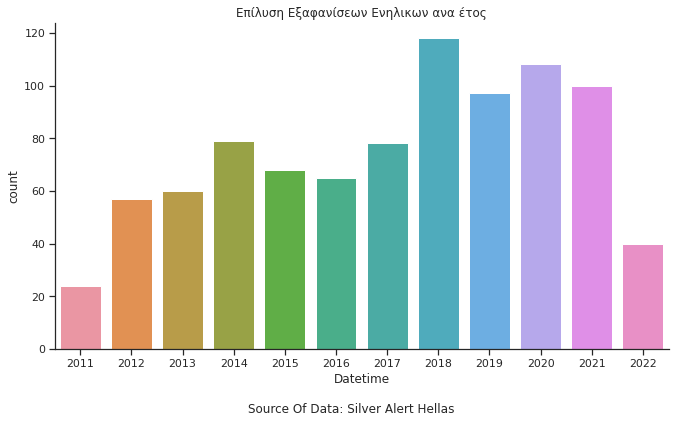

In [32]:
plt.figure(figsize=(11,6))
sns.countplot(x=pd.DatetimeIndex(found['Datetime']).year).set(title='Επίλυση Εξαφανίσεων Ενηλικων ανα έτος')
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0)

Τώρα στο df το συνολικό παρακάτω θα δω το σύνολο από όλες τις υποθέσεις εξαφανίσεων (λυμένες και μη, ανα tag) ανα έτος.

In [33]:
dfinal.Year.value_counts()

2018    136
2020    131
2021    121
2019    117
2014     87
2017     82
2015     79
2016     75
2013     68
2012     65
2022     54
2011     29
Name: Year, dtype: int64

Text(0.8, 0, 'Source Of Data: Silver Alert Hellas')

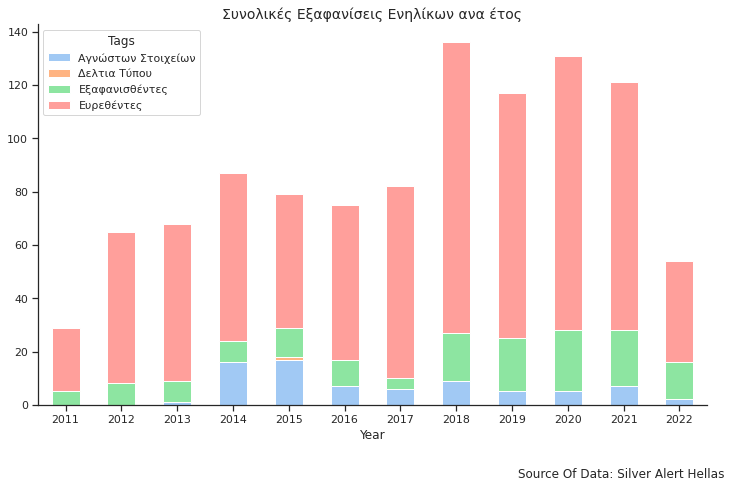

In [34]:
df_plot = dfinal.groupby(['Tags', 'Year']).size().reset_index().pivot(columns='Tags', index='Year', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(12,7))
plt.tick_params(axis='x', labelrotation=0) #για να μην ειναι στραβα τα χρονια
plt.title('Συνολικές Εξαφανίσεις Ενηλίκων ανα έτος', fontsize= 14)
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12,  x=0.8 ,y=0)

Text(0.8, 0, 'Source Of Data: Silver Alert Hellas')

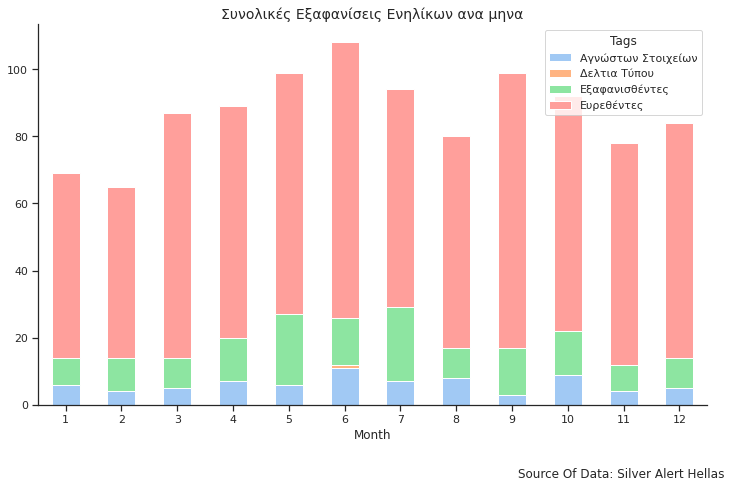

In [35]:
df_plot = dfinal.groupby(['Tags', 'Month']).size().reset_index().pivot(columns='Tags', index='Month', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(12,7))
plt.tick_params(axis='x', labelrotation=0)
plt.title('Συνολικές Εξαφανίσεις Ενηλίκων ανα μηνα', fontsize= 14)
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12,  x=0.8 ,y=0)

In [41]:
dfinal['Age'].value_counts()

73.0    11
74.0    10
71.0     9
81.0     9
77.0     7
        ..
24.0     1
57.0     1
33.0     1
38.0     1
34.0     1
Name: Age, Length: 61, dtype: int64

In [42]:
dfinal.loc[dfinal['Age'].between(20,29), 'age_group'] = '20+'
dfinal.loc[dfinal['Age'].between(30,39), 'age_group'] = '30+'
dfinal.loc[dfinal['Age'].between(40,49), 'age_group'] = '40+'
dfinal.loc[dfinal['Age'].between(50,59), 'age_group'] = '50+'
dfinal.loc[dfinal['Age'].between(60,69), 'age_group'] = '60+'
dfinal.loc[dfinal['Age'].between(70,79), 'age_group'] = '70+'
dfinal.loc[dfinal['Age'].between(80,89), 'age_group'] = '80+'
dfinal.loc[dfinal['Age'].between(90,99), 'age_group'] = '90+'

In [44]:
dfinal['age_group'].value_counts()

70+    63
80+    42
60+    34
30+    14
40+    14
50+    12
20+     9
90+     5
Name: age_group, dtype: int64

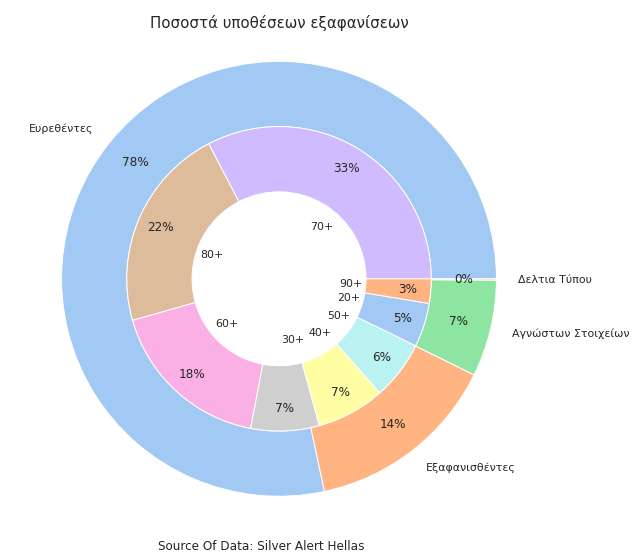

In [79]:
outer = dfinal['Tags'].value_counts()
inner = dfinal['age_group'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.0f%%', pctdistance=0.85, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels=inner.index, labeldistance=0.4,
       autopct='%1.0f%%', pctdistance=0.85, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.title('Ποσοστά υποθέσεων εξαφανίσεων', fontsize=15, y=0.95)
plt.suptitle('Source Of Data: Silver Alert Hellas',fontsize=12, y=0.14)
plt.show()